In [29]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\cell_counts_full (1).xlsx"
excel_file = pd.ExcelFile(file_path)

# Print the sheet names to see what they are
print(excel_file.sheet_names)

['full_focus1', 'full_focus2', 'standard resolution ', 'QC']


In [34]:
# Load both sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='full_focus1')
sheet2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
sheet1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
sheet2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
sheet1 = sheet1.drop(columns=['Threshold','Total Area',"Average Size", "%Area", "Mean", "Perim."])
sheet2 = sheet2.drop(columns=['Threshold','Total Area',"Average Size", "%Area", "Mean", "Perim."])

sheet1['Slice'] = sheet1['Slice'].str.lower()
sheet2['Slice'] = sheet2['Slice'].str.lower()

# Drop all rows with NaN values
sheet1 = sheet1.dropna()
sheet2 = sheet2.dropna()

# Define subject-specific mappings for Channel in full_focus1
subject_mappings_full_focus1 = {
    '2_1': {'GFP': 'NAc', 'mcherry': 'MD'},
    '2_2': {'GFP': 'NAc', 'mCherry': 'MD'},
    '2_3': {'GFP': 'NAc', 'mcherry': 'MD'},
    '1_2': {'GFP': 'MD', 'mcherry': 'NAc'},
    '1_3': {'GFP': 'MD', 'mcherry': 'NAc'}
}

# Define the default mapping for full_focus2
default_mapping_full_focus2 = {'GFP': 'MD', 'mcherry': 'NAc'}

# Function to extract Channel from Slice
def extract_channel(slice_value):
    if 'GFP' in slice_value:
        return 'GFP'
    elif 'mcherry' in slice_value:
        return 'mcherry'
    elif 'cfos' in slice_value:
        return 'cfos'
    return 'Unknown'

# Function to map the channel based on subject
def map_channel(slice_value, channel_value, sheet_name):
    parts = slice_value.split('_')
    subject = parts[1]+'_'+parts[2]  # Extract subject identifier from the Slice column
    if sheet_name == 'full_focus1' and subject in subject_mappings_full_focus1:
        region_mapping = subject_mappings_full_focus1[subject]
        return region_mapping.get(channel_value, 'Unknown')
    elif sheet_name == 'full_focus2':

        return default_mapping_full_focus2.get(channel_value, 'Unknown')
    return 'Unknown'

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    
    # Define overlaps based on the presence of markers in the Slice column
def determine_overlap(slice_value):
    markers = []
    if 'cfos' in slice_value:
        markers.append('cfos')
    if 'GFP' in slice_value:
        markers.append('GFP')
    if 'mcherry' in slice_value:
        markers.append('mcherry')
    
    # Join markers to form the overlap label
    return '_'.join(sorted(markers))

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)
    return df

# Function to extract the subject number from the Slice column
def extract_subject(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 3:
        return parts[1] + '_' + parts[2]  # Assuming the subject number is in the 2nd and 3rd position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)

    return df
# Function to extract the region information from the Slice column
def extract_region(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 4:
        return parts[3]  # Assuming the region information is in the 4th position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Region'] = df['Slice'].apply(extract_region)    # Extract the region information
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)
    return df

# Apply the updated function to both sheets
sheet1_processed = process_data(sheet1, 'full_focus1')
sheet2_processed = process_data(sheet2, 'full_focus2')

# Convert necessary columns to numeric types (if they aren't already)
sheet1_processed["Count"] = pd.to_numeric(sheet1_processed["Count"], errors='coerce')
#sheet1_processed["Total Area"] = pd.to_numeric(sheet1_processed["Total Area"], errors='coerce')
#sheet1_processed["Average Size"] = pd.to_numeric(sheet1_processed["Average Size"], errors='coerce')
#sheet1_processed["%Area"] = pd.to_numeric(sheet1_processed["%Area"], errors='coerce')
#sheet1_processed["Mean"] = pd.to_numeric(sheet1_processed["Mean"], errors='coerce')
#sheet1_processed["Perim."] = pd.to_numeric(sheet1_processed["Perim."], errors='coerce')

sheet2_processed["Count"] = pd.to_numeric(sheet2_processed["Count"], errors='coerce')
#sheet2_processed["Total Area"] = pd.to_numeric(sheet2_processed["Total Area"], errors='coerce')
#sheet2_processed["Average Size"] = pd.to_numeric(sheet2_processed["Average Size"], errors='coerce')
#sheet2_processed["%Area"] = pd.to_numeric(sheet2_processed["%Area"], errors='coerce')
#sheet2_processed["Mean"] = pd.to_numeric(sheet2_processed["Mean"], errors='coerce')
#sheet2_processed["Perim."] = pd.to_numeric(sheet2_processed["Perim."], errors='coerce')


# Print the processed data (or save to new Excel file, etc.)
print("Processed data from full_focus1:")
print(sheet1_processed)

print("Processed data from full_focus2:")
print(sheet2_processed)


Processed data from full_focus1:
                                    Slice  Count Subject Region  Channel  \
0                ff_2_2_aacc_1_1_cfos.png     96     2_2   aacc     cfos   
1                 ff_2_2_aacc_1_1_gfp.png     96     2_2   aacc  Unknown   
2             ff_2_2_aacc_1_1_mcherry.png    100     2_2   aacc  mcherry   
3         ff_2_2_aacc_1_1_mcherry_gfp.png     39     2_2   aacc  mcherry   
4    ff_2_2_aacc_1_1_mcherry_gfp_cfos.png     40     2_2   aacc  mcherry   
..                                    ...    ...     ...    ...      ...   
170                ff_2_3_mil_6_1_gfp.png    387     2_3    mil  Unknown   
171           ff_2_3_mil_6_1_gfp_cfos.png    450     2_3    mil     cfos   
172        ff_2_3_mil_6_1_mcherry_gfp.png    431     2_3    mil  mcherry   
173   ff_2_3_mil_6_1_mcherry_gfp_cfos.png    385     2_3    mil  mcherry   
174       ff_2_3_mil_6_1_mcherry_cfos.png    410     2_3    mil  mcherry   

    CellType       Overlap  
0    Unknown          cfo

In [35]:
import pandas as pd

# Load both sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='full_focus1')
sheet2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
sheet1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
sheet2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
sheet1 = sheet1.drop(columns=['Threshold','Total Area',"Average Size", "%Area", "Mean", "Perim."])
sheet2 = sheet2.drop(columns=['Threshold','Total Area',"Average Size", "%Area", "Mean", "Perim."])

# Convert necessary columns to numeric types (if they aren't already)
sheet1_processed["Count"] = pd.to_numeric(sheet1_processed["Count"], errors='coerce')
sheet2_processed["Count"] = pd.to_numeric(sheet2_processed["Count"], errors='coerce')

# Drop all rows with NaN values
sheet1 = sheet1.dropna()
sheet2 = sheet2.dropna()

# Define subject-specific mappings for Channel in full_focus1
subject_mappings_full_focus1 = {
    '2_1': {'GFP': 'NAc', 'mcherry': 'MD'},
    '2_2': {'GFP': 'NAc', 'mcherry': 'MD'},
    '2_3': {'GFP': 'NAc', 'mcherry': 'MD'},
    '1_2': {'GFP': 'MD', 'mcherry': 'NAc'},
    '1_3': {'GFP': 'MD', 'mcherry': 'NAc'}
}

# Define the default mapping for full_focus2
default_mapping_full_focus2 = {'GFP': 'MD', 'mcherry': 'NAc'}

# Function to extract Channel from Slice
def extract_channel(slice_value):
    if 'GFP' in slice_value:
        return 'GFP'
    elif 'mcherry' in slice_value:
        return 'mcherry'
    elif 'cfos' in slice_value:
        return 'cfos'
    return 'Unknown'

# Function to map the channel based on subject
def map_channel(slice_value, channel_value, sheet_name):
    parts = slice_value.split('_')
    subject = parts[1]+'_'+parts[2]  # Extract subject identifier from the Slice column
    if sheet_name == 'full_focus1' and subject in subject_mappings_full_focus1:
        region_mapping = subject_mappings_full_focus1[subject]
        return region_mapping.get(channel_value, 'Unknown')
    elif sheet_name == 'full_focus2':

        return default_mapping_full_focus2.get(channel_value, 'Unknown')
    return 'Unknown'

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    
    # Define overlaps based on the presence of markers in the Slice column
def determine_overlap(slice_value):
    markers = []
    if 'cfos' in slice_value:
        markers.append('cfos')
    if 'GFP' in slice_value:
        markers.append('GFP')
    if 'mcherry' in slice_value:
        markers.append('mcherry')
    
    # Join markers to form the overlap label
    return '_'.join(sorted(markers))

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)
    return df

# Function to extract the subject number from the Slice column
def extract_subject(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 3:
        return parts[1] + '_' + parts[2]  # Assuming the subject number is in the 2nd and 3rd position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)

    return df
# Function to extract the region information from the Slice column
def extract_region(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 4:
        return parts[3]  # Assuming the region information is in the 4th position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Region'] = df['Slice'].apply(extract_region)    # Extract the region information
    df['Channel'] = df['Slice'].apply(extract_channel)
    df['CellType'] = df.apply(lambda row: map_channel(row['Slice'], row['Channel'], sheet_name), axis=1)
    df['Overlap'] = df['Slice'].apply(determine_overlap)
    return df

# Apply the updated function to both sheets
sheet1_processed = process_data(sheet1, 'full_focus1')
sheet2_processed = process_data(sheet2, 'full_focus2')

# Convert necessary columns to numeric types (if they aren't already)
sheet1_processed["Count"] = pd.to_numeric(sheet1_processed["Count"], errors='coerce')
sheet2_processed["Count"] = pd.to_numeric(sheet2_processed["Count"], errors='coerce')


# Print the processed data (or save to new Excel file, etc.)
print("Processed data from full_focus1:")
print(sheet1_processed)

print("Processed data from full_focus2:")
print(sheet2_processed)


Processed data from full_focus1:
                                    Slice  Count Subject Region  Channel  \
0                FF_2_2_aACC_1_1_cFos.png     96     2_2   aACC  Unknown   
1                 FF_2_2_aACC_1_1_GFP.png     96     2_2   aACC      GFP   
2             FF_2_2_aACC_1_1_mCherry.png    100     2_2   aACC  Unknown   
3         FF_2_2_aACC_1_1_mCherry_GFP.png     39     2_2   aACC      GFP   
4    FF_2_2_aACC_1_1_mCherry_GFP_cFos.png     40     2_2   aACC      GFP   
..                                    ...    ...     ...    ...      ...   
170                FF_2_3_mIL_6_1_GFP.png    387     2_3    mIL      GFP   
171           FF_2_3_mIL_6_1_GFP_cFos.png    450     2_3    mIL      GFP   
172        FF_2_3_mIL_6_1_mCherry_GFP.png    431     2_3    mIL      GFP   
173   FF_2_3_mIL_6_1_mCherry_GFP_cFos.png    385     2_3    mIL      GFP   
174       FF_2_3_mIL_6_1_mCherry_cFos.png    410     2_3    mIL  Unknown   

    CellType Overlap  
0    Unknown          
1       

In [5]:
import pandas as pd

# Add a Condition column
sheet1_processed['Condition'] = '10 min familiar'
sheet2_processed['Condition'] = 'cagemate'

# Combine both sheets into one DataFrame
combined_df = pd.concat([sheet1_processed, sheet2_processed], ignore_index=True)

# Group by Region, Subject, Condition, and Overlap, then sum the Count column
grouped_df = combined_df.groupby(['Region', 'Subject', 'Condition', 'Overlap'])['Count'].sum().reset_index()

# Pivot the table to get Overlaps as columns with hierarchical index of Region, Subject, and Condition
pivot_df = grouped_df.pivot_table(index=['Region', 'Subject', 'Condition'], columns='Overlap', values='Count', fill_value=0)

# Optional: reset the index to make 'Region', 'Subject', and 'Condition' columns again instead of part of the hierarchical index
pivot_df = pivot_df.reset_index()

# Display the resultant DataFrame
print("Aggregated DataFrame with totals for each overlap column split into regions, subjects, and conditions:")
print(pivot_df)
combined_df

Aggregated DataFrame with totals for each overlap column split into regions, subjects, and conditions:
Overlap Region Subject        Condition    GFP  GFP_cFos  GFP_cFos_mCherry  \
0         aACC     2_1  10 min familiar  452.0     450.0             449.0   
1         aACC     2_2  10 min familiar  194.0       0.0              40.0   
2         aACC     2_3  10 min familiar  213.0     177.0             173.0   
3         aACC     3_1         cagemate  103.0     102.0              82.0   
4         aACC     3_2         cagemate   72.0      51.0              48.0   
5         aACC     3_3         cagemate  104.0     130.0             152.0   
6          aIL     2_1  10 min familiar  518.0     411.0             424.0   
7          aIL     2_2  10 min familiar  242.0     197.0              63.0   
8          aIL     2_3  10 min familiar  282.0     235.0             227.0   
9          aIL     3_2         cagemate   64.0      55.0              54.0   
10         aIL     3_3         cagemate

,Slice,Count,Subject,Region,Channel,CellType,Overlap,Condition
0,FF_2_2_aACC_1_1_cFos.png,96,2_2,aACC,cFos,Unknown,cFos,10 min familiar
1,FF_2_2_aACC_1_1_GFP.png,96,2_2,aACC,GFP,NAc,GFP,10 min familiar
2,FF_2_2_aACC_1_1_mCherry.png,100,2_2,aACC,mCherry,MD,mCherry,10 min familiar
3,FF_2_2_aACC_1_1_mCherry_GFP.png,39,2_2,aACC,GFP,NAc,GFP_mCherry,10 min familiar
4,FF_2_2_aACC_1_1_mCherry_GFP_cFos.png,40,2_2,aACC,GFP,NAc,GFP_cFos_mCherry,10 min familiar
...,...,...,...,...,...,...,...,...
366,FF_3_3_pIL_5_2_mCherry.png,133,3_3,pIL,mCherry,NAc,mCherry,cagemate
367,FF_3_3_pIL_5_2_cFos_mCherry.png,85,3_3,pIL,mCherry,NAc,cFos_mCherry,cagemate
368,FF_3_3_pIL_5_2_cFos_GFP.png,60,3_3,pIL,GFP,MD,GFP_cFos,cagemate
369,FF_3_3_pIL_5_2_mCherry_GFP.png,53,3_3,pIL,GFP,MD,GFP_mCherry,cagemate


Start HERE!! Data is organized. I would like to used this dataframe to run cell count analysis on my AAVrg and cFos experiment. The first analysis I want is to add the total counts for each marker and the overlaps ploting this in a venn. Then I want to look at the percent cFos overlap for each region ignoring the AP axis so looking at ACC, PL, and IL. while also considering projectors. 

In [6]:
import pandas as pd

# Load both sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='full_focus1')
sheet2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
sheet1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
sheet2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
sheet1 = sheet1.drop(columns=['Threshold', 'Total Area', "Average Size", "%Area", "Mean", "Perim."])
sheet2 = sheet2.drop(columns=['Threshold', 'Total Area', "Average Size", "%Area", "Mean", "Perim."])

# Define subject-specific mappings for Channel in full_focus1
subject_mappings_full_focus1 = {
    '2_1': {'GFP': 'NAc', 'mCherry': 'MD'},
    '2_2': {'GFP': 'NAc', 'mCherry': 'MD'},
    '2_3': {'GFP': 'NAc', 'mCherry': 'MD'},
    '1_2': {'GFP': 'MD', 'mCherry': 'NAc'},
    '1_3': {'GFP': 'MD', 'mCherry': 'NAc'}
}

# Define the default mapping for full_focus2
default_mapping_full_focus2 = {'GFP': 'MD', 'mCherry': 'NAc'}

# Function to extract markers from Slice and create projector label
def create_projector(slice_value, subject, sheet_name):
    markers = []
    if 'cFos' in slice_value:
        markers.append('cFos')
    if 'GFP' in slice_value:
        markers.append('GFP')
    if 'mCherry' in slice_value:
        markers.append('mCherry')

    if sheet_name == 'full_focus1' and subject in subject_mappings_full_focus1:
        region_mapping = subject_mappings_full_focus1[subject]
    else:
        region_mapping = default_mapping_full_focus2

    combined_markers = []
    for marker in markers:
        if marker in ['GFP', 'mCherry']:
            region = region_mapping.get(marker, 'Unknown')
            combined_markers.append(region)
        else:
            combined_markers.append(marker)
    
    return '+'.join(combined_markers) + '+'

# Function to extract the subject number from the Slice column
def extract_subject(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 3:
        return parts[1] + '_' + parts[2]  # Assuming the subject number is in the 2nd and 3rd position
    return 'Unknown'  # In case the slice format is unexpected

# Function to extract the region information from the Slice column
def extract_region(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 4:
        return parts[3]  # Assuming the region information is in the 4th position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Region'] = df['Slice'].apply(extract_region)    # Extract the region information
    df['Projector'] = df.apply(lambda row: create_projector(row['Slice'], row['Subject'], sheet_name), axis=1)
    return df

# Apply the updated function to both sheets
sheet1_processed = process_data(sheet1, 'full_focus1')
sheet2_processed = process_data(sheet2, 'full_focus2')

# Convert necessary columns to numeric types (if they aren't already)
sheet1_processed["Count"] = pd.to_numeric(sheet1_processed["Count"], errors='coerce')
sheet2_processed["Count"] = pd.to_numeric(sheet2_processed["Count"], errors='coerce')

# Print the processed data (or save to new Excel file, etc.)
print("Processed data from full_focus1:")
print(sheet1_processed)

print("Processed data from full_focus2:")
print(sheet2_processed)

# Example: Check the projector value for a specific Slice
example_slice = 'FF_2_2_aACC_1_1_mCherry_GFP_cFos.png'
example_row = sheet1_processed[sheet1_processed['Slice'] == example_slice]
if not example_row.empty:
    example_projector = example_row['Projector'].values[0]
    print(f"Projector for {example_slice}: {example_projector}")

Processed data from full_focus1:
                                    Slice  Count Subject Region     Projector
0                FF_2_2_aACC_1_1_cFos.png     96     2_2   aACC         cFos+
1                 FF_2_2_aACC_1_1_GFP.png     96     2_2   aACC          NAc+
2             FF_2_2_aACC_1_1_mCherry.png    100     2_2   aACC           MD+
3         FF_2_2_aACC_1_1_mCherry_GFP.png     39     2_2   aACC       NAc+MD+
4    FF_2_2_aACC_1_1_mCherry_GFP_cFos.png     40     2_2   aACC  cFos+NAc+MD+
..                                    ...    ...     ...    ...           ...
170                FF_2_3_mIL_6_1_GFP.png    387     2_3    mIL          NAc+
171           FF_2_3_mIL_6_1_GFP_cFos.png    450     2_3    mIL     cFos+NAc+
172        FF_2_3_mIL_6_1_mCherry_GFP.png    431     2_3    mIL       NAc+MD+
173   FF_2_3_mIL_6_1_mCherry_GFP_cFos.png    385     2_3    mIL  cFos+NAc+MD+
174       FF_2_3_mIL_6_1_mCherry_cFos.png    410     2_3    mIL      cFos+MD+

[175 rows x 5 columns]
Process

Calculate Total cell counts.... Not counting correctly. For full_focus2 the counts are correct. But for the full_focus1 the counts are off. I summed them using excel full_focus1: MD+ = 7224, NAc+ = 6049, NAc+MD+ = 4670, cFos = 5308, cFos+MD+ = 5080, cFos+NAc+ = 4641, cFos+MD+NAc+ = 4166

In [7]:
projector_counts = pd.concat([sheet1_processed.groupby('Projector')['Count'].sum().reset_index().assign(sheet='full_focus1'),
                             sheet2_processed.groupby('Projector')['Count'].sum().reset_index().assign(sheet='full_focus2')])

print("Total counts for each projector by sheet:")
print(projector_counts)

Total counts for each projector by sheet:
      Projector  Count        sheet
0           MD+   7224  full_focus1
1          NAc+   6147  full_focus1
2       NAc+MD+   4833  full_focus1
3         cFos+   5308  full_focus1
4      cFos+MD+   4641  full_focus1
5     cFos+NAc+   4982  full_focus1
6  cFos+NAc+MD+   4003  full_focus1
0           MD+   3451  full_focus2
1       MD+NAc+   2378  full_focus2
2          NAc+   4799  full_focus2
3         cFos+   4309  full_focus2
4      cFos+MD+   2786  full_focus2
5  cFos+MD+NAc+   2423  full_focus2
6     cFos+NAc+   3079  full_focus2


In [146]:
sheet1_processed
sheet2_processed


,Slice,Count,Subject,Region,Projector,Condition
0,FF_3_1_aACC_1_1_cFos.png,103,3_1,aACC,cFos+,cagemate
1,FF_3_1_aACC_1_1_GFP.png,103,3_1,aACC,MD+,cagemate
2,FF_3_1_aACC_1_1_mCherry.png,72,3_1,aACC,NAc+,cagemate
3,FF_3_1_aACC_1_1_cFos_mCherry.png,86,3_1,aACC,cFos+NAc+,cagemate
4,FF_3_1_aACC_1_1_cFos_GFP.png,102,3_1,aACC,cFos+MD+,cagemate
...,...,...,...,...,...,...
191,FF_3_3_pIL_5_2_mCherry.png,133,3_3,pIL,NAc+,cagemate
192,FF_3_3_pIL_5_2_cFos_mCherry.png,85,3_3,pIL,cFos+NAc+,cagemate
193,FF_3_3_pIL_5_2_cFos_GFP.png,60,3_3,pIL,cFos+MD+,cagemate
194,FF_3_3_pIL_5_2_mCherry_GFP.png,53,3_3,pIL,MD+NAc+,cagemate


In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Add a Condition column to identify the source
sheet1_processed['Condition'] = '10 min familiar'
sheet2_processed['Condition'] = 'cagemate'

# Combine the two DataFrames into one
merged_df = pd.concat([sheet1_processed, sheet2_processed], ignore_index=True)

merged_df


,Slice,Count,Subject,Region,Projector,Condition
0,FF_2_2_aACC_1_1_cFos.png,96,2_2,aACC,cFos+,10 min familiar
1,FF_2_2_aACC_1_1_GFP.png,96,2_2,aACC,NAc+,10 min familiar
2,FF_2_2_aACC_1_1_mCherry.png,100,2_2,aACC,MD+,10 min familiar
3,FF_2_2_aACC_1_1_mCherry_GFP.png,39,2_2,aACC,NAc+MD+,10 min familiar
4,FF_2_2_aACC_1_1_mCherry_GFP_cFos.png,40,2_2,aACC,cFos+NAc+MD+,10 min familiar
...,...,...,...,...,...,...
366,FF_3_3_pIL_5_2_mCherry.png,133,3_3,pIL,NAc+,cagemate
367,FF_3_3_pIL_5_2_cFos_mCherry.png,85,3_3,pIL,cFos+NAc+,cagemate
368,FF_3_3_pIL_5_2_cFos_GFP.png,60,3_3,pIL,cFos+MD+,cagemate
369,FF_3_3_pIL_5_2_mCherry_GFP.png,53,3_3,pIL,MD+NAc+,cagemate


In [181]:
import pandas as pd

# Define the file path and load the data
file_path = r'C:\Users\sjs93\OneDrive - University of Florida\cell_counts_full (1).xlsx'
full_focus1 = pd.read_excel(file_path, sheet_name='full_focus1')
full_focus2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
full_focus1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
full_focus2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
full_focus1 = full_focus1.drop(columns=['Threshold'])
full_focus2 = full_focus2.drop(columns=['Threshold'])

# Drop all rows with NaN values
full_focus1 = full_focus1.dropna()
full_focus2 = full_focus2.dropna()

# Group by the Slice column and sum the counts for each group
full_focus1_aggregated = full_focus1.groupby('Slice')['Count'].sum().reset_index()
full_focus2_aggregated = full_focus2.groupby('Slice')['Count'].sum().reset_index()

# Calculate the total counts for full_focus1 and full_focus2
total_full_focus1 = full_focus1_aggregated['Count'].sum()
total_full_focus2 = full_focus2_aggregated['Count'].sum()

# Print the results
print(f"Total counts for full_focus1: {total_full_focus1}")
print(f"Total counts for full_focus2: {total_full_focus2}")

Total counts for full_focus1: 37138
Total counts for full_focus2: 23225


In [182]:
import pandas as pd

# Define the file path and load the data
file_path = r'C:\Users\sjs93\OneDrive - University of Florida\cell_counts_full (1).xlsx'
full_focus1 = pd.read_excel(file_path, sheet_name='full_focus1')
full_focus2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
full_focus1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
full_focus2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
full_focus1 = full_focus1.drop(columns=['Threshold'])
full_focus2 = full_focus2.drop(columns=['Threshold'])

# Drop all rows with NaN values
full_focus1 = full_focus1.dropna()
full_focus2 = full_focus2.dropna()

# Define clear functions to accurately count single markers without overlaps
def calculate_cfos_only(df):
    # Filter rows containing only 'cFos' without other markers
    cfos_only = df[df['Slice'].str.contains('cFos') & ~df['Slice'].str.contains('GFP|mCherry')]
    cfos_only_aggregated = cfos_only.groupby('Slice')['Count'].sum().reset_index()
    total_cfos_only = cfos_only_aggregated['Count'].sum()
    return total_cfos_only

def calculate_gfp_only(df):
    # Filter rows containing only 'GFP' without other markers
    gfp_only = df[df['Slice'].str.contains('GFP') & ~df['Slice'].str.contains('cFos|mCherry')]
    gfp_only_aggregated = gfp_only.groupby('Slice')['Count'].sum().reset_index()
    total_gfp_only = gfp_only_aggregated['Count'].sum()
    return total_gfp_only

def calculate_mcherry_only(df):
    # Filter rows containing only 'mCherry' without other markers
    mcherry_only = df[df['Slice'].str.contains('mCherry') & ~df['Slice'].str.contains('cFos|GFP')]
    mcherry_only_aggregated = mcherry_only.groupby('Slice')['Count'].sum().reset_index()
    total_mcherry_only = mcherry_only_aggregated['Count'].sum()
    return total_mcherry_only

# Reiterate, calculating totals explicitly
def calculate_totals(df):
    total = df['Count'].sum()
    cfos_only_total = calculate_cfos_only(df)
    gfp_only_total = calculate_gfp_only(df)
    mcherry_only_total = calculate_mcherry_only(df)
    
    return {
        'Total': total,
        'cFos_only': cfos_only_total,
        'GFP_only': gfp_only_total,
        'mCherry_only': mcherry_only_total
    }

# Calculate and print totals for full_focus1 and full_focus2
totals_focus1 = calculate_totals(full_focus1)
totals_focus2 = calculate_totals(full_focus2)

print(f"\nTotals for full_focus1: {totals_focus1}")
print(f"Totals for full_focus2: {totals_focus2}")


Totals for full_focus1: {'Total': 37138, 'cFos_only': 5308, 'GFP_only': 6147, 'mCherry_only': 7224}
Totals for full_focus2: {'Total': 23225, 'cFos_only': 4309, 'GFP_only': 3451, 'mCherry_only': 4799}


In [183]:
import pandas as pd

# Load the spreadsheet
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\marker_counts_overlaps.xlsx"  # update this with your actual file path
df = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Display the data for both sheets
for sheet_name, sheet_data in df.items():
    print(f"\nSheet: {sheet_name}")
    print(sheet_data)
sheet_data


Sheet: cagemate_markers
   cFos  GFP (MD)  mCherry (NAc)  cFos_GFP (active MD)  \
0  4309      3451           4799                  3079   

   cFos_mCherry (active NAc)  cFos_GFP_mCherry (active MD and NAc)  \
0                       2786                                  2378   

   GFP_mCherry ( MD and NAc)  
0                       2423  

Sheet: 10min_fam
   cFos  GFP (NAc)  mCherry (MD)  cFos_GFP (active NAc)  \
0  5308       6049          7224                   4641   

   cFos_mCherry (active MD)  cFos_GFP_mCherry (active NAc and MD)  \
0                      5080                                  4673   

   GFP_mCherry ( NAc and MD)  
0                       4166  


,cFos,GFP (NAc),mCherry (MD),cFos_GFP (active NAc),cFos_mCherry (active MD),cFos_GFP_mCherry (active NAc and MD),GFP_mCherry ( NAc and MD)
0,5308,6049,7224,4641,5080,4673,4166


Available sheet names: dict_keys(['cagemate_markers', '10min_fam'])


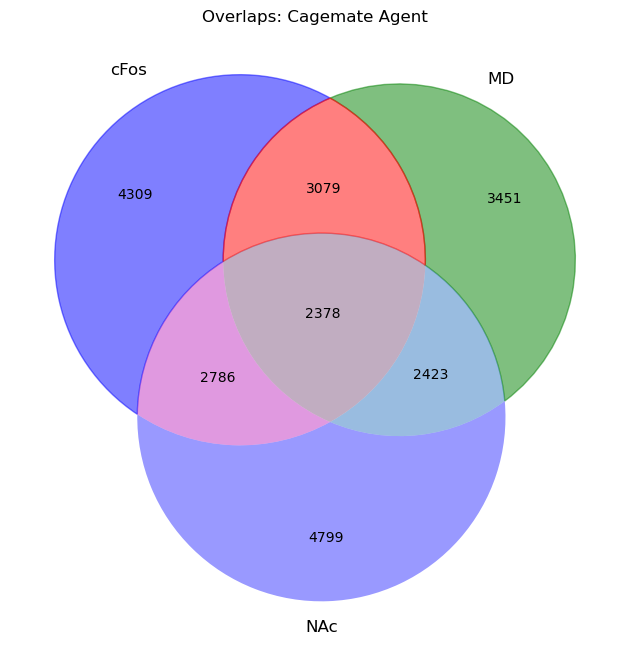

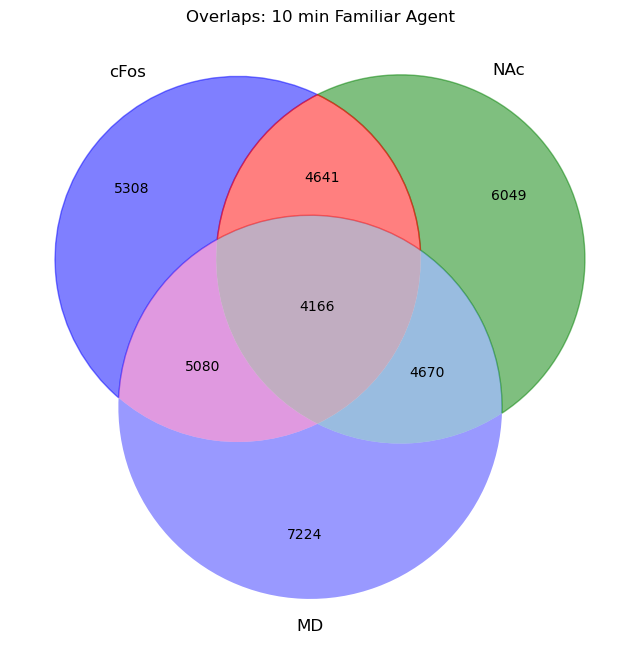

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# Load the spreadsheet
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\marker_counts_overlaps.xlsx"  # Use the correct file path
df = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Check the available sheet names
print("Available sheet names:", df.keys())

# Define a function to plot Venn diagrams with consistent colors and positions
def plot_venn_diagram(sheet_data, title, labels, colors):
    # Extract the counts
    cfos = sheet_data.iloc[0, 0]
    gfp = sheet_data.iloc[0, 1]
    mcherry = sheet_data.iloc[0, 2]
    cfos_gfp = sheet_data.iloc[0, 3]
    cfos_mcherry = sheet_data.iloc[0, 4]
    cfos_gfp_mcherry = sheet_data.iloc[0, 5]
    gfp_mcherry = sheet_data.iloc[0, 6]

    # Define the subset sizes
    subset_sizes = {
        '100': cfos,  # Only cFos
        '010': gfp,  # Only GFP
        '001': mcherry,  # Only mCherry
        '110': cfos_gfp,  # cFos + GFP
        '101': cfos_mcherry,  # cFos + mCherry
        '011': gfp_mcherry,  # GFP + mCherry
        '111': cfos_gfp_mcherry  # cFos + GFP + mCherry
    }

    # Plot the Venn diagram with consistent colors and positions
    plt.figure(figsize=(8, 8))
    venn = venn3(subsets=subset_sizes, set_labels=labels)
    
    # Assign colors to the regions
    for patch, color in zip(venn.patches, colors):
        if patch:
            patch.set_color(color)
            patch.set_alpha(0.5)
    
    plt.title(title)
    plt.show()

# Define the consistent colors (e.g., blue for cFos, green for GFP, red for mCherry)
colors = ['blue', 'green', 'red']  # Adjust these colors as needed

# Use the correct sheet names for your data
cagemate_sheet_name = 'cagemate_markers'  # Replace with the actual sheet name if different
familiar_sheet_name = '10min_fam'  # Replace with the actual sheet name if different

# Plot the Venn diagram for "Cagemate Agent"
plot_venn_diagram(
    df[cagemate_sheet_name], 
    title="Overlaps: Cagemate Agent", 
    labels=('cFos', 'MD', 'NAc'),
    colors=colors
)

# Plot the Venn diagram for "10 min Familiar Agent"
plot_venn_diagram(
    df[familiar_sheet_name], 
    title="Overlaps: 10 min Familiar Agent", 
    labels=('cFos', 'NAc', 'MD'),
    colors=colors
)


Available sheet names: dict_keys(['cagemate_markers', '10min_fam'])


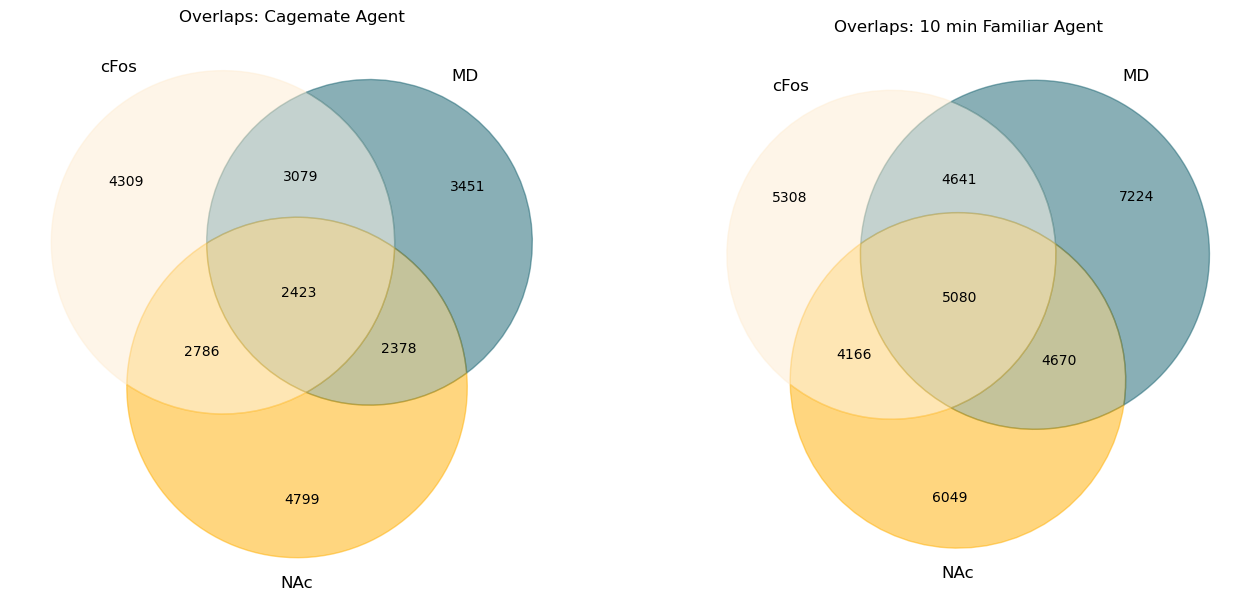

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
from matplotlib.colors import to_rgb, to_hex

# Load the spreadsheet
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\marker_counts_overlaps.xlsx"  # Use the correct file path
df = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Check the available sheet names
print("Available sheet names:", df.keys())

# Define a function to mix two colors
def blend_colors(color1, color2, ratio=0.5):
    rgb1 = to_rgb(color1)
    rgb2 = to_rgb(color2)
    blended_rgb = [ratio * c1 + (1 - ratio) * c2 for c1, c2 in zip(rgb1, rgb2)]
    return to_hex(blended_rgb)

# Define a function to plot Venn diagrams with consistent colors and positions
def plot_venn_diagram(ax, counts, title, labels, colors):
    cfos, md, nac, cfos_md, cfos_nac, md_nac, cfos_md_nac = counts

    # Define the subset sizes
    subset_sizes = {
        '100': cfos,  # Only cFos
        '010': md,    # Only MD
        '001': nac,   # Only NAc
        '110': cfos_md, # cFos + MD
        '101': cfos_nac, # cFos + NAc
        '011': md_nac,  # MD + NAc
        '111': cfos_md_nac  # cFos + MD + NAc
    }

    # Plot the Venn diagram with consistent colors and positions
    venn = venn3(subsets=subset_sizes, set_labels=labels, ax=ax)

    # Assign colors to the regions
    color_map = {
        '100': colors[0],  # cFos
        '010': colors[1],  # MD
        '001': colors[2],  # NAc
        '110': blend_colors(colors[0], colors[1]),  # cFos + MD
        '101': blend_colors(colors[0], colors[2]),  # cFos + NAc
        '011': blend_colors(colors[1], colors[2]),  # MD + NAc
        '111': blend_colors(blend_colors(colors[0], colors[1]), colors[2])  # cFos + MD + NAc
    }

    for subset, color in color_map.items():
        if venn.get_patch_by_id(subset):
            venn.get_patch_by_id(subset).set_color(color)
            venn.get_patch_by_id(subset).set_alpha(0.5)
    
    ax.set_title(title)

# Define the labels to ensure consistent positioning
consistent_labels = ('cFos', 'MD', 'NAc')

# Define the specific colors (hex codes as requested)
colors = ['#FEEDD3', '#15616F', '#FFAF00']  # cFos, MD, NAc respectively

# Example of data extraction
cagemate_counts = df['cagemate_markers'].iloc[0, :7].tolist()  # Assuming columns are in required order
familiar_counts = [df['10min_fam'].iloc[0, 0], df['10min_fam'].iloc[0, 2], df['10min_fam'].iloc[0, 1], 
                   df['10min_fam'].iloc[0, 3], df['10min_fam'].iloc[0, 5], df['10min_fam'].iloc[0, 6], df['10min_fam'].iloc[0, 4]]

# Create subplots to place them side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the Venn diagram for "Cagemate Agent"
plot_venn_diagram(
    ax=axs[0],
    counts=cagemate_counts, 
    title="Overlaps: Cagemate Agent", 
    labels=consistent_labels,
    colors=colors
)

# Plot the Venn diagram for "10 min Familiar Agent"
plot_venn_diagram(
    ax=axs[1],
    counts=familiar_counts, 
    title="Overlaps: 10 min Familiar Agent", 
    labels=consistent_labels,
    colors=colors
)

plt.show()

In [164]:
import pandas as pd

# Load the spreadsheet
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\marker_counts_overlaps.xlsx"  # Use the correct file path
df = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Extract data from each sheet
cagemate_data = df['cagemate_markers']
fam_data = df['10min_fam']

# Inspect the first few rows of each dataframe
print("Cagemate data:")
print(cagemate_data.head())
print("\n10 min Familiar Agent data:")
print(fam_data.head())

Cagemate data:
   cFos  GFP (MD)  mCherry (NAc)  cFos_GFP (active MD)  \
0  4309      3451           4799                  3079   

   cFos_mCherry (active NAc)  cFos_GFP_mCherry (active MD and NAc)  \
0                       2786                                  2378   

   GFP_mCherry ( MD and NAc)  
0                       2423  

10 min Familiar Agent data:
   cFos  GFP (NAc)  mCherry (MD)  cFos_GFP (active NAc)  \
0  5308       6049          7224                   4641   

   cFos_mCherry (active MD)  cFos_GFP_mCherry (active NAc and MD)  \
0                      5080                                  4673   

   GFP_mCherry ( NAc and MD)  
0                       4166  


In [165]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# Load the spreadsheet
file_path = r"C:\Users\sjs93\OneDrive - University of Florida\marker_counts_overlaps.xlsx"  # Use the correct file path
df = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Check the available sheet names
print("Available sheet names:", df.keys())


Available sheet names: dict_keys(['cagemate_markers', '10min_fam'])


<Figure size 1400x800 with 0 Axes>

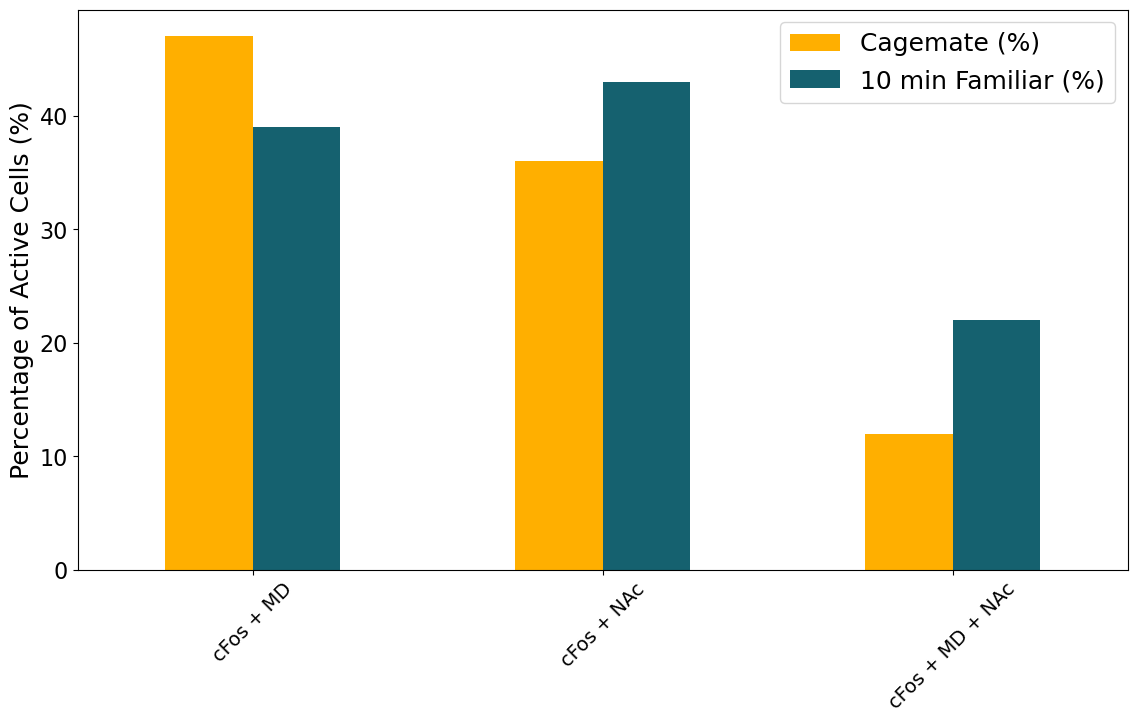

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

# Hardcode the specified data
data = {
    'Overlap Type': ['cFos + MD', 'cFos + NAc', 'cFos + MD + NAc'],
    'Cagemate (%)': [47, 36, 12],
    '10 min Familiar (%)': [39, 43, 22]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Plot the results
plt.figure(figsize=(14, 8))
bars = df.plot(
    x='Overlap Type',
    kind='bar',
    color=['#FFAF00', '#15616F'],
    fontsize=14,
    figsize=(14, 8)
)
plt.ylabel('Percentage of Active Cells (%)', fontsize=18)
plt.xlabel('', fontsize=16)  # Remove the "Overlap Type" title
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=18, loc='upper right')
plt.tight_layout()

# Adjusting figure to make sure y-axis is fully visible
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.2)
plt.show()

In [100]:
df

{'cagemate_markers':    cFos  GFP (MD)  mCherry (NAc)  cFos_GFP (active MD)  \
 0  4309      3451           4799                  3079   
 
    cFos_mCherry (active NAc)  cFos_GFP_mCherry (active MD and NAc)  \
 0                       2786                                  2378   
 
    GFP_mCherry ( MD and NAc)  
 0                       2423  ,
 '10min_fam':    cFos  GFP (NAc)  mCherry (MD)  cFos_GFP (active NAc)  \
 0  5308       6049          7224                   4641   
 
    cFos_mCherry (active MD)  cFos_GFP_mCherry (active NAc and MD)  \
 0                      5080                                  4673   
 
    GFP_mCherry ( NAc and MD)  
 0                       4166  }

Average Counts code is not doing the thing

In [17]:
import pandas as pd

# Replace 'your_file.xlsx' with your actual file name
file_path = r'C:\Users\sjs93\OneDrive - University of Florida\cell_counts_full (1).xlsx'

# Load the data from the Excel sheets
full_focus1 = pd.read_excel(file_path, sheet_name='full_focus1')
full_focus2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Convert the 'Slice' column to strings and handle missing values
full_focus1['Slice'] = full_focus1['Slice'].astype(str)
full_focus2['Slice'] = full_focus2['Slice'].astype(str)

# Extract Subject and Channel from Slice for full_focus1
full_focus1['Subject'] = full_focus1['Slice'].apply(lambda x: '_'.join(x.split('_')[2:4]) if len(x.split('_')) > 3 else 'Unknown')
full_focus1['Channel'] = full_focus1['Slice'].apply(lambda x: x.split('_')[-1].split('.')[0] if '.' in x else 'Unknown')

# Group by Subject and Channel, then calculate average Count
average_counts_full_focus1 = full_focus1.groupby(['Subject', 'Channel'])['Count'].mean().reset_index()

# Rename columns for clarity
average_counts_full_focus1.columns = ['Subject', 'Channel', 'Average Count']

print("Average Counts for full_focus1:")
print(average_counts_full_focus1)

# Repeat the extraction and processing for full_focus2 if needed
full_focus2['Subject'] = full_focus2['Slice'].apply(lambda x: '_'.join(x.split('_')[2:4]) if len(x.split('_')) > 3 else 'Unknown')
full_focus2['Channel'] = full_focus2['Slice'].apply(lambda x: x.split('_')[-1].split('.')[0] if '.' in x else 'Unknown')

average_counts_full_focus2 = full_focus2.groupby(['Subject', 'Channel'])['Count'].mean().reset_index()
average_counts_full_focus2.columns = ['Subject', 'Channel', 'Average Count']

print("\nAverage Counts for full_focus2:")
print(average_counts_full_focus2)

Average Counts for full_focus1:
   Subject  Channel  Average Count
0   1_aACC      GFP     224.250000
1   1_aACC     cFos     253.375000
2   1_aACC  mCherry     422.000000
3    1_aIL      GFP     236.750000
4    1_aIL     cFos     197.875000
5    1_aIL  mCherry     251.000000
6    1_aPL      GFP     380.250000
7    1_aPL     cFos     389.000000
8    1_aPL  mCherry     512.500000
9   1_mACC      GFP      98.500000
10  1_mACC     cFos      77.000000
11  1_mACC  mCherry     220.000000
12   1_mIL      GFP     126.000000
13   1_mIL     cFos     144.000000
14   1_mIL  mCherry     275.500000
15  2_aACC      GFP      67.500000
16  2_aACC     cFos      58.666667
17  2_aACC     cfos      98.000000
18  2_aACC  mCherry     100.000000
19   2_aIL      GFP     156.000000
20   2_aIL     cFos     125.750000
21   2_aIL  mCherry     145.000000
22   2_aPL      GFP     153.500000
23   2_aPL     cFos     109.500000
24   2_aPL  mCherry     152.000000
25  2_mACC      GFP     282.500000
26  2_mACC     cFos    